In [2]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

after import change to respectivedirectory and read the csv file using pandas.

In [3]:
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\data\\d17428d0-e-Criminal')

In [4]:
train=pd.read_csv('criminal_train.csv')

In [5]:
test=pd.read_csv('criminal_test.csv')

In [5]:
##first 5 rows of training data
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [41]:
#column names
train.columns

72

In [7]:
##first 5 rows of testing data
test.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


In [8]:
##get count of criminal type using groupby function
train.groupby('Criminal')['Criminal'].count()

Criminal
0    42543
1     3175
Name: Criminal, dtype: int64

Get the unique values for all the columns to know type of values and range of values 

And there is any need for feature scaling or not.

In [20]:
# for i in train.columns:
#     print(i,train[i].unique())
for i in test.columns:
    print(i,test[i].unique())

PERID [66583679 35494679 79424679 ..., 80134730 65323398 90906563]
IFATHER [4 2 1 3]
NRCH17_2 [ 0  1  3  2 -1]
IRHHSIZ2 [4 3 6 2 1 5]
IIHHSIZ2 [1 3]
IRKI17_2 [2 1 3 4]
IIKI17_2 [1 3]
IRHH65_2 [1 2 3]
IIHH65_2 [1 3 2]
PRXRETRY [99  2 94 98]
PRXYDATA [99  1  2 94 98]
MEDICARE [ 2  1 97 94 85 98]
CAIDCHIP [ 2  1 94 97 85 98]
CHAMPUS [ 2  1 94 85 98 97]
PRVHLTIN [ 1  2 94 97 85 98]
GRPHLTIN [ 1 99  2 98 97 94 85]
HLTINNOS [99  2  1 94 98 97]
HLCNOTYR [ 2 99  1 98 94 97 85]
HLCNOTMO [99  1  4 10  2  3  7  9  6 98  8  5 11 12 94 97]
HLCLAST [99  4  5  3  1  2 98 94 97]
HLLOSRSN [99  3 10  2  4  7  1  6 98  5 11 12  8 97 94 85  9]
HLNVCOST [99  6  1 98 97]
HLNVOFFR [99  6  1 98 97]
HLNVREF [99  6 98 97  1]
HLNVNEED [99  6 98  1 97]
HLNVSOR [99  1  6 98 97]
IRMCDCHP [2 1]
IIMCDCHP [1 3]
IRMEDICR [2 1]
IIMEDICR [1 3]
IRCHMPUS [2 1]
IICHMPUS [1 3]
IRPRVHLT [1 2]
IIPRVHLT [1 3]
IROTHHLT [99  2  1]
IIOTHHLT [9 1 3]
HLCALLFG [98  1]
HLCALL99 [98  1]
ANYHLTI2 [ 1  2 94 97 98]
IRINSUR4 [1 2]
IIINSUR4

null values are represented in the data using -1 value.

so get the len of -1 containing rows and then drop those rows.

In [9]:
# for i in train.columns:
#     print(i,len(train[train[i]==-1]))
for i in test.columns:
    print(i,len(test[test[i]==-1]))

PERID 0
IFATHER 0
NRCH17_2 8
IRHHSIZ2 0
IIHHSIZ2 0
IRKI17_2 0
IIKI17_2 0
IRHH65_2 0
IIHH65_2 0
PRXRETRY 0
PRXYDATA 0
MEDICARE 0
CAIDCHIP 0
CHAMPUS 0
PRVHLTIN 0
GRPHLTIN 0
HLTINNOS 0
HLCNOTYR 0
HLCNOTMO 0
HLCLAST 0
HLLOSRSN 0
HLNVCOST 0
HLNVOFFR 0
HLNVREF 0
HLNVNEED 0
HLNVSOR 0
IRMCDCHP 0
IIMCDCHP 0
IRMEDICR 0
IIMEDICR 0
IRCHMPUS 0
IICHMPUS 0
IRPRVHLT 0
IIPRVHLT 0
IROTHHLT 0
IIOTHHLT 0
HLCALLFG 0
HLCALL99 0
ANYHLTI2 0
IRINSUR4 0
IIINSUR4 0
OTHINS 0
CELLNOTCL 0
CELLWRKNG 0
IRFAMSOC 0
IIFAMSOC 0
IRFAMSSI 0
IIFAMSSI 0
IRFSTAMP 0
IIFSTAMP 0
IRFAMPMT 0
IIFAMPMT 0
IRFAMSVC 0
IIFAMSVC 0
IRWELMOS 0
IIWELMOS 0
IRPINC3 0
IRFAMIN3 0
IIPINC3 0
IIFAMIN3 0
GOVTPROG 0
POVERTY3 76
TOOLONG 0
TROUBUND 0
PDEN10 0
COUTYP2 0
MAIIN102 0
AIIND102 0
ANALWT_C 0
VESTR 0
VEREP 0


In [16]:
for i in train.columns:
    print(i,train[train[i]==-1].index)

PERID Int64Index([], dtype='int64')
IFATHER Int64Index([], dtype='int64')
NRCH17_2 Int64Index([], dtype='int64')
IRHHSIZ2 Int64Index([], dtype='int64')
IIHHSIZ2 Int64Index([], dtype='int64')
IRKI17_2 Int64Index([], dtype='int64')
IIKI17_2 Int64Index([], dtype='int64')
IRHH65_2 Int64Index([], dtype='int64')
IIHH65_2 Int64Index([], dtype='int64')
PRXRETRY Int64Index([], dtype='int64')
PRXYDATA Int64Index([], dtype='int64')
MEDICARE Int64Index([], dtype='int64')
CAIDCHIP Int64Index([], dtype='int64')
CHAMPUS Int64Index([], dtype='int64')
PRVHLTIN Int64Index([], dtype='int64')
GRPHLTIN Int64Index([], dtype='int64')
HLTINNOS Int64Index([], dtype='int64')
HLCNOTYR Int64Index([], dtype='int64')
HLCNOTMO Int64Index([], dtype='int64')
HLCLAST Int64Index([], dtype='int64')
HLLOSRSN Int64Index([], dtype='int64')
HLNVCOST Int64Index([], dtype='int64')
HLNVOFFR Int64Index([], dtype='int64')
HLNVREF Int64Index([], dtype='int64')
HLNVNEED Int64Index([], dtype='int64')
HLNVSOR Int64Index([], dtype='in

In [6]:
train.drop([19230, 44281],inplace=True)

In [7]:
len(train)

45716

In [12]:
# pd.crosstab(train.POVERTY3,train.Criminal)
pd.crosstab(train.POVERTY3,train.Criminal)

Criminal,0,1
POVERTY3,,
-1,235,106
1,8489,842
2,8767,1458
3,25050,769


get the count of different value in the column 

so that -1 will replaced by highest occur value in the test data.

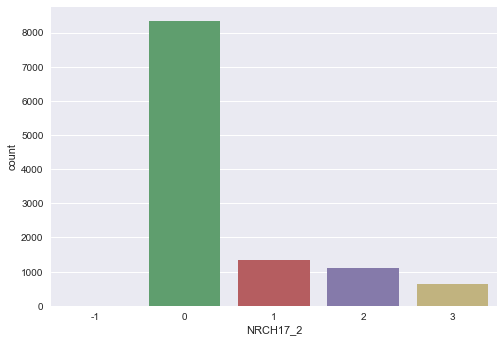

In [13]:
sns.countplot(test.NRCH17_2)

In [8]:
l=['POVERTY3','NRCH17_2']
for i in l:
    train.drop(train[train[i]==-1].index,inplace=True)

In [9]:
##get the perid column and criminal column have to used during creating model
tr_PERID=train['PERID']
ts_Criminal=train['Criminal']

train1=train.drop(['PERID','Criminal'],axis=1)

In [30]:
# train1.head()
test1.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,4,0,4,1,2,1,1,1,99,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,4,0,4,1,1,1,1,1,99,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,2,0,3,1,2,1,1,1,99,1,...,1,2,2,2,2,2,2,266.952503,40040,2
3,4,0,6,1,2,1,1,1,99,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,1,0,4,1,3,1,1,1,99,1,...,3,2,1,1,1,2,2,173.489895,40017,1


In [10]:
test['POVERTY3'].replace(-1,3,inplace=True)
test['NRCH17_2'].replace(-1,0,inplace=True)

In [11]:
ts_PERID=test['PERID']

In [12]:
test1=test.drop(['PERID'],axis=1)

first using the Training data only split into train and test in (.7,.3) ratio.

so that different models accuracy can be found.

following models are tested.
1. KNeighborsClassifier
2. LinearRegression
3. RandomForestClassifier
4. LogisticRegression
5. Lasso

And in the last RandomForestClassifier have been chosen because of accuracy near to 94.6.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
x,y = train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dd1={}
for i in range(2,10):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    prediction_knn = model.predict(x_test)
    dd1[i]=model.score(x_test,y_test)

In [43]:
dd1

{2: 0.93001177509567268,
 3: 0.92279952899617312,
 4: 0.93317633205769801,
 5: 0.931262879010892,
 6: 0.93428024727700909,
 7: 0.9338386811892847,
 8: 0.93428024727700909,
 9: 0.93413305858110096}

In [22]:
len([i for i in prediction_knn if i==1])

272

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
x,y = train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
model = LinearRegression()
model.fit(x_train,y_train)
prediction_lr = model.predict(x_test)
print(model.score(x_test,y_test))

0.21202416471


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
x,y = train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dd={}
for i in range(2,18):
    model = RandomForestClassifier(random_state = i)
    model.fit(x_train,y_train)
    prediction_rfc = model.predict(x_test)
    dd[i]=model.score(x_test,y_test)

In [35]:
dd

{2: 0.94936708860759489,
 3: 0.94936708860759489,
 4: 0.94885192817191644,
 5: 0.94855755078010007,
 6: 0.94789520164851337,
 7: 0.94826317338828381,
 8: 0.94782160730055931,
 9: 0.94929349425964082,
 10: 0.94855755078010007,
 11: 0.94980865469531939,
 12: 0.94944068295554906,
 13: 0.95047100382690608,
 14: 0.94980865469531939,
 15: 0.94877833382396237,
 16: 0.94752722990874305,
 17: 0.9491463055637327}

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
x,y = train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
model = LogisticRegression()
model.fit(x_train,y_train)
prediction_logr = model.predict(x_test)
print(model.score(x_test,y_test))

C:\Users\royal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.934795407713


In [14]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split
x,y = train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
model = Lasso()
model.fit(x_train,y_train)
prediction_logr = model.predict(x_test)
print(model.score(x_test,y_test))

0.0291507377099


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 13)
model.fit(train1,ts_Criminal)
prediction_rfc = model.predict(test1)
print(prediction_rfc[:10])

[0 0 0 0 0 0 0 0 0 0]


Now prediction result and prediction ids are  saved on the file named submission1.csv

In [131]:
sub = pd.DataFrame({'PERID': ts_PERID, 'Criminal': prediction_rfc})
filename = 'submission.csv'
sub.to_csv(filename, index=False)

In [132]:
df=pd.read_csv('submission.csv')
columnsTitles=["PERID","Criminal"]
df=df.reindex(columns=columnsTitles)
filename = 'submission1.csv'
df.to_csv(filename, index=False)

Got the 94.646 score in the leaderboard. 

Do the feature scaling-
1. Data Standardization - Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one

2. Data Normalization - Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.

and then do the RandomForestClassifier.

very minimal increase in training accuracy but same and low testing accuracy.

In [14]:
from sklearn import preprocessing
st_train1 = preprocessing.normalize(train1)
#st_train1 = preprocessing.scale(train1)
st_test = preprocessing.normalize(test1)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
x,y = st_train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dd={}
for i in range(2,18):
    model = RandomForestClassifier(random_state = i)
    model.fit(x_train,y_train)
    prediction_rfc = model.predict(x_test)
    dd[i]=model.score(x_test,y_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 13)
model.fit(st_train1,ts_Criminal)
prediction_rfc = model.predict(st_test)
print(prediction_rfc[:10])

[0 0 0 0 0 0 0 0 0 0]


Applying Neural network

using keras with simple 1 layer with 500 hiddenn units and apply the 'relu' activation funtion.

used the Dropout to 20% and used the Sochastic Gradient descent with 0.05 learning rate.

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

In [ ]:
from sklearn.cross_validation import train_test_split
x,y = st_train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

Y_Train = np_utils.to_categorical(y_train, 2)
Y_Test = np_utils.to_categorical(y_test, 2)

# single layer regression model
model = Sequential()
model.add(Dense(output_dim=500, input_dim=70, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim=2, input_dim=500, init='normal'))
model.add(Activation('softmax'))

model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(x_train, Y_Train, nb_epoch=10, batch_size=100, verbose=1)

# Evaluate
evaluation = model.evaluate(x_test, Y_Test, verbose=1)

In [69]:
print(evaluation)

[0.11489861840719436, 0.94966146596431877]


used the deep neural network with 3 layers deep.

with dropout 20% on first layer and 50% on next layer.

used the RMSprop to reduce  the error with 0.001 learning rate.

In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from sklearn.cross_validation import train_test_split
x,y = st_train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

Y_Train = np_utils.to_categorical(y_train, 2)
Y_Test = np_utils.to_categorical(y_test, 2)

# Logistic regression model
model = Sequential()
model.add(Dense(output_dim=100, input_dim=70, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim=100, input_dim=100, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=2, input_dim=100, init='normal'))
model.add(Activation('softmax'))

model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# model.add(Dense(output_dim=100, input_dim=70, init='normal', activation='sigmoid'))
# model.add(Dense(output_dim=100, input_dim=100, init='normal', activation='sigmoid'))
# model.add(Dense(output_dim=2, input_dim=100, init='normal', activation='softmax'))

# model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# Train
history = model.fit(x_train, Y_Train, nb_epoch=10, batch_size=100, verbose=1)

# Evaluate
evaluation = model.evaluate(x_test, Y_Test, verbose=1)

In [53]:
pred=model.predict_classes(x_test)

In [55]:
pred[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

Last run using deep neural network with same configuration of above but this time for 50 Epochs.

Got the accuracy of 95.90% on training data.

In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop

Y_Train = np_utils.to_categorical(ts_Criminal, 2)

# Logistic regression model
model = Sequential()
model.add(Dense(output_dim=100, input_dim=70, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim=100, input_dim=100, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=2, input_dim=100, init='normal'))
model.add(Activation('softmax'))

model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(st_train1, Y_Train, nb_epoch=50, batch_size=100, verbose=1)

# predict classes
prediction_rfc=model.predict_classes(st_test)

Now Got 95.101 score on competition leaderboard

Applying xgboost

first apply the simple xgboost model with default settings

got the accuracy of 95.54% on training data.

In [15]:
import xgboost as xgb

In [16]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [128]:
x,y = st_train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

model = XGBClassifier(max_depth=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
prediction_rfc = [int(round(value)) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)

In [129]:
accuracy

0.95363556078893141

In [149]:
x,y = st_train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dd2={}
for i in range(3,9):
    
    model = XGBClassifier(max_depth=i)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    dd2[i]=accuracy

In [141]:
print(accuracy)

0.955549013836


In [17]:
model = XGBClassifier(max_depth=5)
model.fit(st_train1,ts_Criminal)

y_pred = model.predict(st_test)
prediction_rfc = [int(round(value)) for value in y_pred]

Plot the feature importance graph to know which feature we can leave 

and which only feature can be used to train and test other models

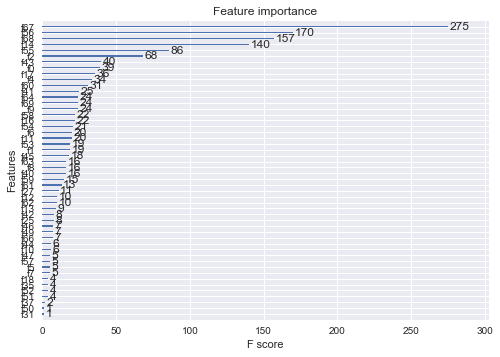

In [134]:
#fig, ax = plt.subplots(figsize=(120, 120))
xgb.plot_importance(model)

Now Got 95.258 score on competition leaderboard

Applying lightgbm (Light Gradient boosting)

first apply the simple lightgbm model with default settings

got the accuracy of 95.31% on training data.

lightgbm is 3-4 times faster than Xgboost and gave same and more accuracy.

In [19]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [49]:
model=lgb.LGBMClassifier()
x,y = st_train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

In [47]:
accuracy

0.95319399470120691

after that create the tuned model with param

which gave the 95.53% accuracy on trainning data.

In [88]:
x,y = st_train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

train_data=lgb.Dataset(x_train,label=y_train)

param = {'num_leaves':100,'objective':'binary','max_depth':8,'learning_rate':.05,'max_bin':400}
param['metric'] = ['auc', 'binary_logloss']

model=lgb.train(param,train_data,100)

y_pred=model.predict(x_test)
prediction_rfc = [int(round(value)) for value in y_pred]

accuracy = accuracy_score(y_test, prediction_rfc)

In [89]:
accuracy

0.95532823079187523

In [130]:
train_data=lgb.Dataset(tr2,label=ts_Criminal)
param = {'num_leaves':100,'objective':'binary','max_depth':8,'learning_rate':.05,'max_bin':400}
param['metric'] = ['auc', 'binary_logloss']

model=lgb.train(param,train_data,100)

y_pred=model.predict(ts2)
prediction_rfc = [int(round(value)) for value in y_pred]

      feature          gain  split
31  Column_31  3.820787e+01    100
56  Column_56  2.315104e+01    326
55  Column_55  1.226086e+01    215
10  Column_10  5.270910e+00     66
0    Column_0  4.073447e+00    446
32  Column_32  2.714560e+00    135
40  Column_40  1.354933e+00     45
2    Column_2  1.099711e+00    302
43  Column_43  1.096280e+00    159
27  Column_27  8.976761e-01      9
14  Column_14  8.509392e-01    199
60  Column_60  6.439554e-01    174
16  Column_16  6.005793e-01    120
4    Column_4  5.177108e-01    144
69  Column_69  5.033066e-01    156
63  Column_63  4.345302e-01    116
61  Column_61  4.107867e-01    120
6    Column_6  3.943434e-01    121
41  Column_41  3.872759e-01    201
64  Column_64  3.833609e-01    119
58  Column_58  3.827915e-01     91
9    Column_9  3.808786e-01    194
11  Column_11  3.181197e-01     89
17  Column_17  3.146985e-01     80
59  Column_59  3.092468e-01    100
45  Column_45  2.481116e-01     59
47  Column_47  2.479381e-01     83
62  Column_62  2.102

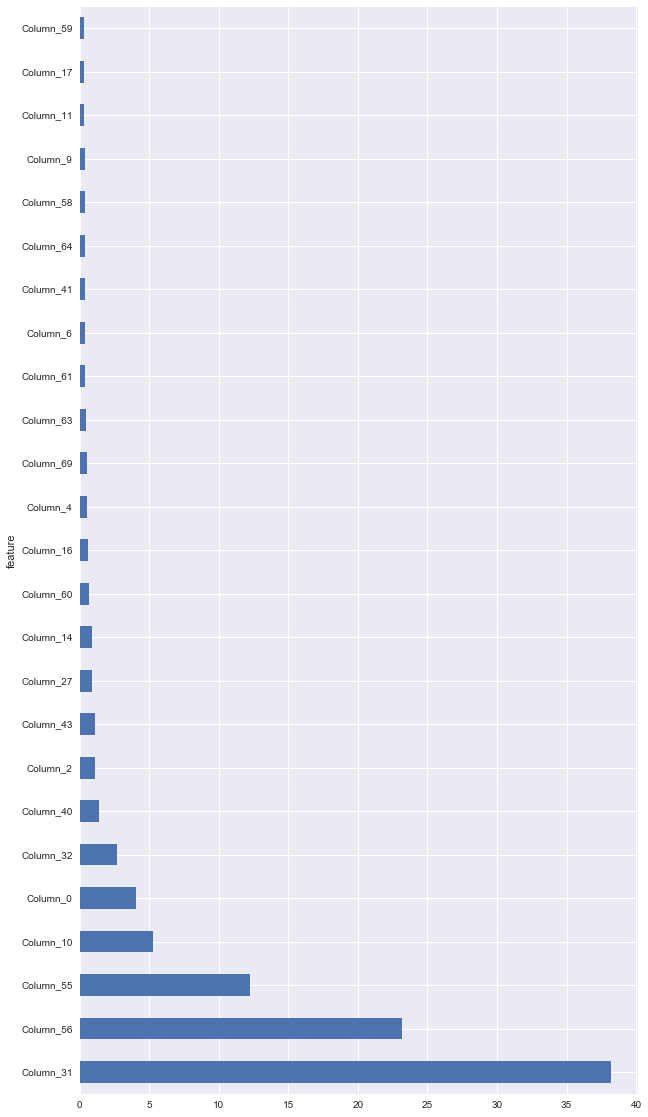

In [115]:
gain = model.feature_importance('gain')
ft = pd.DataFrame({'feature':model.feature_name(), 'split':model.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(ft)

plt.figure()
ft[['feature','gain']].head(25).plot(kind='barh', x='feature', y='gain', legend=False, figsize=(10, 20))

Now Got 95.293 score on competition leaderboard

with catboost got 95.48% accuracy in training.but it is more slower than above two

In [95]:
from catboost import CatBoostClassifier

In [ ]:
model=CatBoostClassifier(iterations=80, depth=3, learning_rate=0.1, loss_function='Logloss')
x,y = st_train1,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

model.fit(st_train1, ts_Criminal)
y_pred = model.predict(st_test)
prediction_rfc = [int(round(value)) for value in y_pred]

Got 95.101 score on competition scoreboard

delete the features which got 0 gain in the feature importance.

but final accuracy was same as before which is 95.293 score.

In [124]:
tr2=pd.DataFrame(st_train1)
ts2=pd.DataFrame(st_test)

tr2=tr2.drop([21,22,23,24,28,36],axis=1)
ts2=ts2.drop([21,22,23,24,28,36],axis=1)

In [126]:
x,y = tr2,ts_Criminal
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

train_data=lgb.Dataset(x_train,label=y_train)

param = {'num_leaves':100,'objective':'binary','max_depth':8,'learning_rate':.05,'max_bin':400}
param['metric'] = ['auc', 'binary_logloss']

model=lgb.train(param,train_data,100)

y_pred=model.predict(x_test)
prediction_rfc = [int(round(value)) for value in y_pred]

accuracy = accuracy_score(y_test, prediction_rfc)

In [127]:
accuracy

0.95488666470415073